Nota: Antes de iniciar a hacerlo vi unos ejemplos que ya estaban realizados de los cuales me basé. Al final están los créditos.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio

Ver el formato de los datos, la mayoría de los datos están normalizados menos Amount y Time, pero la columna de Time no es complétamente necesaria.

In [2]:
data= pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

Vemos cuantos datos tenemos en total

In [3]:
data.shape

(284807, 31)

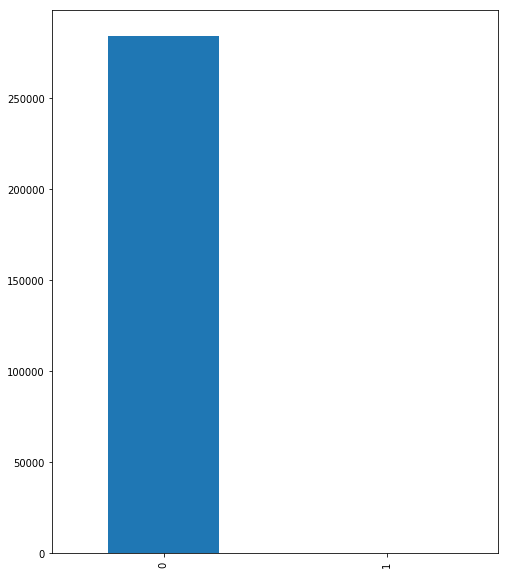

In [4]:
count_Class=pd.value_counts(data["Class"], sort= True)
count_Class.plot(kind= 'bar', figsize=(8, 10))

In [5]:
count_Class

0    284315
1       492
Name: Class, dtype: int64

Vemos que el total de casos de fraude es mucho menor que el número total de casos normales. Existen 284315 casos de transacciones normales y 492 casos de fraude

Si creamos el modelo con estos datos obtendríamos un modelo que predice como una transacción normal la mayoría de las veces ya que no cuenta con suficientes datos de transacciones fraudulentas por lo que necesitamos cambiar los datos, en este caso se va a hacer un undersample que consiste en elegir solo una porción de los datos que representan la mayoría para que quede una proporción de 50% y 50%.

In [6]:
No_of_frauds= len(data[data["Class"]==1])
fraud_index= np.array(data[data["Class"]==1].index)
normal_index= data[data["Class"]==0].index

## Se eligen aleatoreamente los índices para los datos de transacciones fraudulentas
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])
undersampled_data= data.iloc[undersampled_indices, :]
print(undersampled_data.head())

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...         V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...    0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...    0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ...   -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...    0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ...   -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.04

In [7]:
undersampled_data.shape

(984, 31)

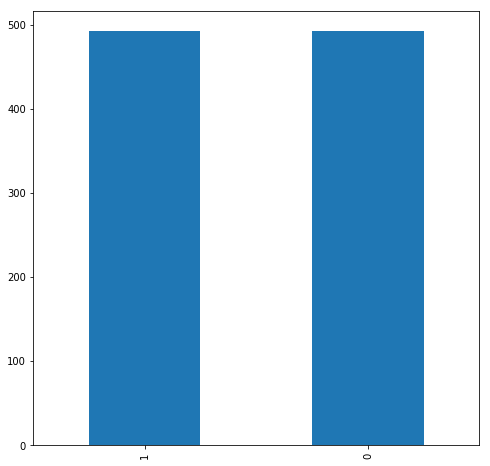

In [8]:
count_Class=pd.value_counts(undersampled_data["Class"], sort= True)
count_Class.plot(kind= 'bar', figsize=(8, 8))

Ahora se normaliza la columna de "amount"

In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
undersampled_data["scaled_Amount"]=  sc.fit_transform(undersampled_data.iloc[:,29].values.reshape(-1,1))

## Se remueve los datos de tiempo y amount anterior
undersampled_data= undersampled_data.drop(["Time","Amount"], axis= 1)
print(undersampled_data.head())

            V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

            V8        V9       V10      ...             V21       V22  \
541   1.391657 -2.770089 -2.772272      ...        0.517232 -0.035049   
623  -0.067794 -0.270953 -0.838587      ...        0.661696  0.435477   
4920 -0.399147 -0.238253 -1.525412      ...       -0.294166 -0.932391   
6108 -0.248778 -0.247768 -4.801637      ...        0.573574  0.176968   
6329 -0.496358 -1.282858 -2.447469      ...       -0.379068 -0.704181   

           V23       V24       V25       V26       V27       V28  Class  \
541  -0.465211  0

/home/antonio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
from sklearn.model_selection import train_test_split
X= undersampled_data.iloc[:, undersampled_data.columns != "Class"].values
y= undersampled_data.iloc[:, undersampled_data.columns == "Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [11]:
X_train.shape

(738, 29)

In [12]:
X_test.shape

(246, 29)

In [13]:
y_train.shape

(738, 1)

In [14]:
y_test.shape

(246, 1)

In [15]:
from sklearn.svm import SVC
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
from sklearn import metrics
metrics.mean_absolute_error(y_test.ravel(), classifier.predict(X_test))

0.065040650406504072

In [17]:
from sklearn import cross_validation
resultado =  cross_validation.cross_val_score(classifier, X_train,y_train.ravel(),cv=5,scoring='accuracy')
print(resultado)

[ 0.90540541  0.85135135  0.9527027   0.94557823  0.9047619 ]


/home/antonio/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.01, penalty = "l1")
lr.fit(X_train,y_train.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
from sklearn import metrics
metrics.mean_absolute_error(y_test.ravel(), lr.predict(X_test))

0.06910569105691057

In [20]:
from sklearn import cross_validation
resultado =  cross_validation.cross_val_score(lr, X_train,y_train.ravel(),cv=5,scoring='accuracy')
print(resultado)

[ 0.83108108  0.80405405  0.81756757  0.85714286  0.81632653]


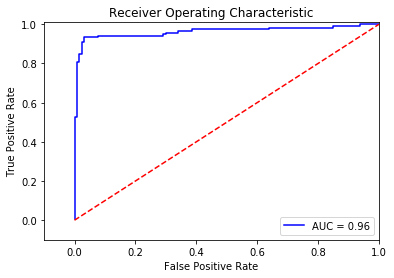

In [21]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
y_pred_score = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Credits
https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

(joparga3)

https://www.kaggle.com/ruskay7/classifying-credit-card-transactions-using-svm

(Rohith Sai Krishna)